<a href="https://colab.research.google.com/github/ShapatinAA/smgmo/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

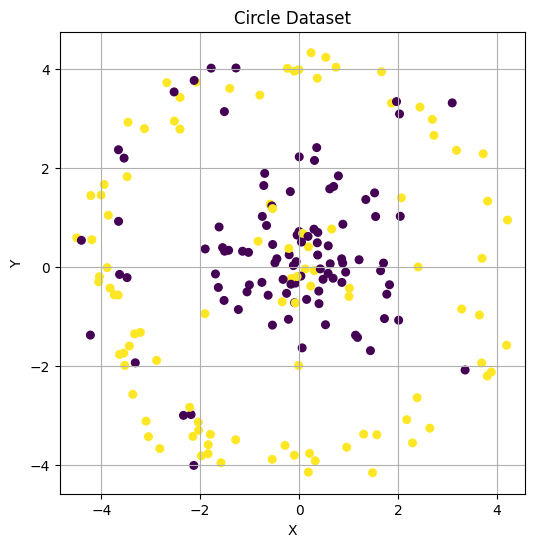

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def generate_circle(radius_ring, radius_center, num_points_ring, num_points_center, noise_range, probability):
    # Generate points for the ring
    angles_ring = np.random.rand(num_points_ring) * 2 * np.pi
    x_ring = radius_ring * np.cos(angles_ring)
    y_ring = radius_ring * np.sin(angles_ring)

    # Generate points for the center circle
    angles_range = np.random.rand(num_points_center) * 2 * np.pi
    radius_range = np.random.uniform(0, radius_center, num_points_center)
    x_center = radius_range * np.cos(angles_range)
    y_center = radius_range * np.sin(angles_range)

    # Combine coordinates of the ring and center circle
    x = np.concatenate((x_ring, x_center))
    y = np.concatenate((y_ring, y_center))

    # Add noise
    x += np.random.uniform(-noise_range, noise_range, len(x))
    y += np.random.uniform(-noise_range, noise_range, len(y))

    # Generate labels (0 for center circle, 1 for outer ring)
    labels_ring = np.ones(num_points_ring)
    labels_center = np.zeros(num_points_center)

    # Randomly assign some points in the ring and center circle labels based on probabilities
    num_points_to_change_ring = int(probability * num_points_ring)
    num_points_to_change_center = int(probability * num_points_center)

    random_indices_ring = np.random.choice(num_points_ring, size=num_points_to_change_ring, replace=False)
    random_indices_center = np.random.choice(num_points_center, size=num_points_to_change_center, replace=False)

    labels_ring[random_indices_ring] = 0
    labels_center[random_indices_center] = 1

    labels = np.concatenate((labels_ring, labels_center))


    # Combine coordinates and labels into a single array
    data = np.column_stack((x, y, labels))

    return data

# Generate circle with center circle data
radius_ring = 4
radius_center = 2
num_points_ring = 100
num_points_center = 100
noise_range = 0.5  # Range of uniform noise
probability = 0.2
circle_data = generate_circle(radius_ring, radius_center, num_points_ring, num_points_center, noise_range, probability)

# Visualize the circle with center circle data
plt.figure(figsize=(6, 6))
plt.scatter(circle_data[:, 0], circle_data[:, 1], c=circle_data[:, 2], cmap='viridis', s=30)
plt.title('Circle Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.grid(True)
plt.show()

In [15]:
def generate_xor(num_points, padding, axis_range, noise):
    # Generate XOR data points

    x1 = np.random.uniform(-axis_range, axis_range, num_points)
    x2 = np.random.uniform(-axis_range, axis_range, num_points)
    y = np.logical_xor(x1 > 0, x2 > 0)

    # Add padding
    x1 += np.where(x1 > 0, padding, -padding)
    x2 += np.where(x2 > 0, padding, -padding)

    # Randomly assign some points labels based on probabilities
    num_points_to_change = int(noise * num_points) #chosing number of points to change
    random_indices = np.random.choice(num_points, size=num_points_to_change, replace=False) # making array of changment
    y[random_indices] = np.logical_not(y[random_indices]) # notting

    # Combine coordinates and labels into a single array
    data = np.column_stack((x1, x2, y))

    return data

# Generate XOR dataset
num_points = 400
padding = 0.3
axis_range = 5
noise = 0.1
xor_data = generate_xor(num_points, padding, axis_range, noise)

# Visualize the XOR dataset
plt.figure(figsize=(6, 6))
plt.scatter(xor_data[:, 0], xor_data[:, 1], c=xor_data[:, 2], cmap='viridis', s=30)
plt.title('XOR Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

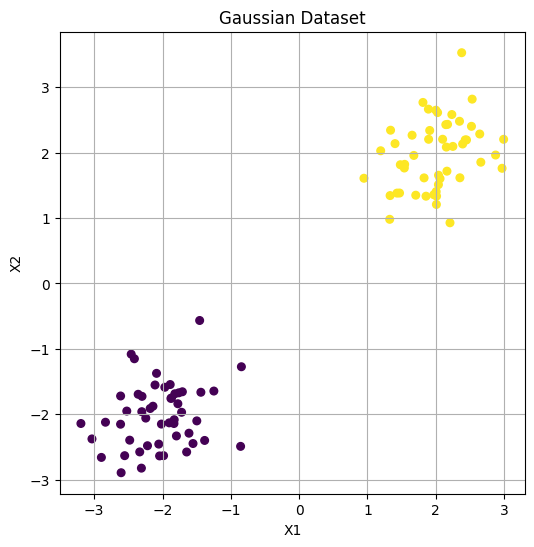

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_gauss(num_samples, noise, center_first_x, center_first_y, center_second_x, center_second_y):
    points = []

    variance_scale = lambda x: np.interp(x, [0, 1], [0.5, 4]) #this is callback for variance: noise converted to varince in x and y
    variance = variance_scale(noise)

    def gen_gauss(cx, cy, label):
        for i in range(num_samples // 2):
            x = np.random.normal(cx, variance) # generating point near cx with some variance
            y = np.random.normal(cy, variance) # generating point near cy with some variance
            points.append([x, y, label])

    gen_gauss(center_first_x, center_first_y, 1)  # Gaussian with positive examples.
    gen_gauss(center_second_x, center_second_y, 0)  # Gaussian with negative examples.

    return np.array(points)

# Example usage:
num_samples = 100
noise = 0.0
center_first_x = 2
center_first_y = 2
center_second_x = -2
center_second_y = -2
gauss_data = generate_gauss(num_samples, noise, center_first_x, center_first_y, center_second_x, center_second_y)

# Visualize the Gaussian dataset
plt.figure(figsize=(6, 6))
plt.scatter(gauss_data[:, 0], gauss_data[:, 1], c=gauss_data[:, 2], cmap='viridis', s=30)
plt.title('Gaussian Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

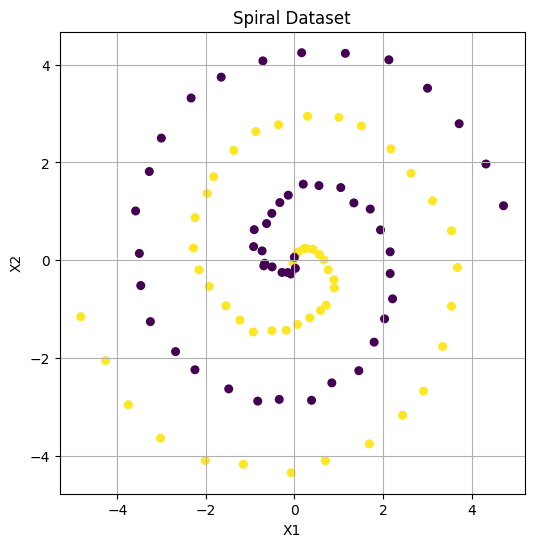

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral(num_samples, noise):
    points = []
    n = num_samples // 2

    def gen_spiral(delta_t, label):
        for i in range(n):
            r = i / n * 5 # radius for point
            t = 1.75 * i / n * 2 * np.pi + delta_t # angle for point
            x = r * np.sin(t) + np.random.uniform(-1, 1) * noise
            y = r * np.cos(t) + np.random.uniform(-1, 1) * noise
            points.append([x, y, label])

    gen_spiral(0, 1)  # Positive examples.
    gen_spiral(np.pi, -1)  # Negative examples.

    return np.array(points)

# Example usage:
num_samples = 100
noise = 0.1
spiral_data = generate_spiral(num_samples, noise)

# Visualize the spiral dataset
plt.figure(figsize=(6, 6))
plt.scatter(spiral_data[:, 0], spiral_data[:, 1], c=spiral_data[:, 2], cmap='viridis', s=30)
plt.title('Spiral Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

In [25]:
import numpy as np

def step_function(x):
    return np.where(x >= 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class ElementaryPerceptron:
    def __init__(self, learning_rate=0.1, activation_func=step_function):
        self.weights = None
        self.learning_rate = learning_rate
        self.activation_func = activation_func

    def train(self, X, y, epochs=10):
        # Initialize weights
        self.weights = np.zeros(X.shape[1] + 1)

        # Training loop
        for _ in range(epochs):
            for xi, target in zip(X, y):
                xi = np.insert(xi, 0, 1)  # Bias term
                prediction = self.activation_func(np.dot(xi, self.weights))
                self.weights += self.learning_rate * (target - prediction) * xi

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        return self.activation_func(np.dot(X, self.weights))

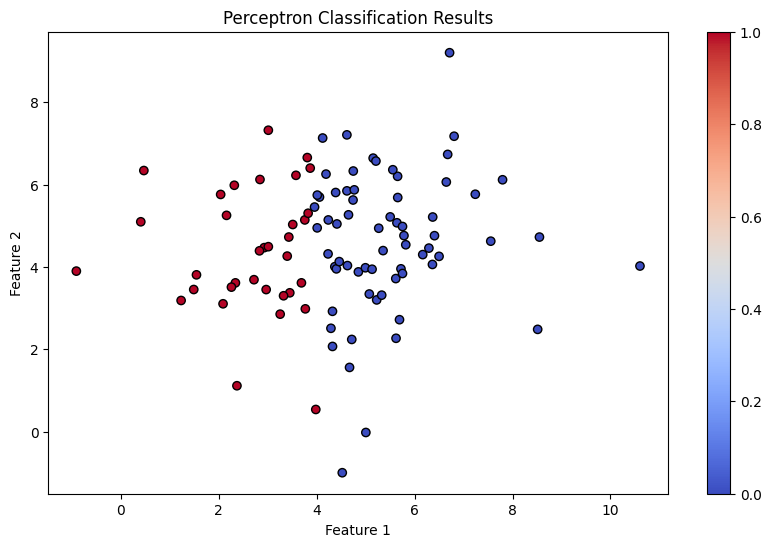

Accuracy: 0.62
Accuracy with high learning rate: 0.62
Accuracy with low learning rate: 0.62
Accuracy with few epochs: 0.62


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Генерация данных для гаусса
num_samples = 500
noise = 0.3
center_first_x = 4
center_first_y = 4
center_second_x = 5
center_second_y = 5
gauss_data = generate_gauss(num_samples, noise, center_first_x, center_first_y, center_second_x, center_second_y)

# Генерация данных для колец
radius_ring = 4
radius_center = 2
num_points_ring = 100
num_points_center = 100
noise_range = 0.5  # Range of uniform noise
probability = 0.2
circle_data = generate_circle(radius_ring, radius_center, num_points_ring, num_points_center, noise_range, probability)

# Генерация данных XOR
num_points = 400
padding = 0.3
axis_range = 5
noise = 0.1
xor_data = generate_xor(num_points, padding, axis_range, noise)

# Генерация данных для спирали
num_samples = 100
noise = 0.1
spiral_data = generate_spiral(num_samples, noise)

# Визуализация исходных данных гаусс
plt.figure(figsize=(10, 6))
plt.scatter(gauss_data[:, 0], gauss_data[:, 1], c=gauss_data[:, 2], cmap='coolwarm', marker='o', edgecolors='k')
plt.title('Initial Gaussian Distribution of Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()
"""
# Визуализация исходных данных круг
plt.figure(figsize=(10, 6))
plt.scatter(circle_data[:, 0], circle_data[:, 1], c=circle_data[:, 2], cmap='coolwarm', edgecolor='k', marker='o')
plt.title('Circle Distribution Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

# Визуализация данных xor
plt.figure(figsize=(10, 6))
plt.scatter(xor_data[:, 0], xor_data[:, 1], c=xor_data[:, 2], cmap='coolwarm', edgecolor='k', marker='o')
plt.title('XOR Distribution Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

# Визуализация данных spiral
plt.figure(figsize=(10, 6))
plt.scatter(spiral_data[:, 0], spiral_data[:, 1], c=spiral_data[:, 2], cmap='coolwarm', edgecolor='k', marker='o')
plt.title('Spiral Distribution Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()
"""
# Разделение данных
X = gauss_data[:, :2]
y = gauss_data[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение перцептрона
perceptron = ElementaryPerceptron(learning_rate=10, activation_func=step_function)
perceptron.train(X_train, y_train)

# Предсказание на тестовых данных
y_pred = perceptron.predict(X_test)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='o', edgecolors='k', label='Test Data')
plt.title('Perceptron Classification Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

# Вычисление точности
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")

# Создание перцептрона с слишком высокой скоростью обучения
perceptron_high_lr = ElementaryPerceptron(learning_rate=1.0, activation_func=step_function)
perceptron_high_lr.train(X_train, y_train, epochs=10)

# Создание перцептрона с слишком низкой скоростью обучения
perceptron_low_lr = ElementaryPerceptron(learning_rate=0.001, activation_func=step_function)
perceptron_low_lr.train(X_train, y_train, epochs=10)

# Создание перцептрона с недостаточным количеством эпох
perceptron_few_epochs = ElementaryPerceptron(learning_rate=50, activation_func=step_function)
perceptron_few_epochs.train(X_train, y_train, epochs=2)

# Предсказание и оценка моделей
y_pred_high_lr = perceptron_high_lr.predict(X_test)
y_pred_low_lr = perceptron_low_lr.predict(X_test)
y_pred_few_epochs = perceptron_few_epochs.predict(X_test)

# Визуализация результатов и вывод точности для каждой модели
print("Accuracy with high learning rate:", np.mean(y_pred_high_lr == y_test))
print("Accuracy with low learning rate:", np.mean(y_pred_low_lr == y_test))
print("Accuracy with few epochs:", np.mean(y_pred_few_epochs == y_test))

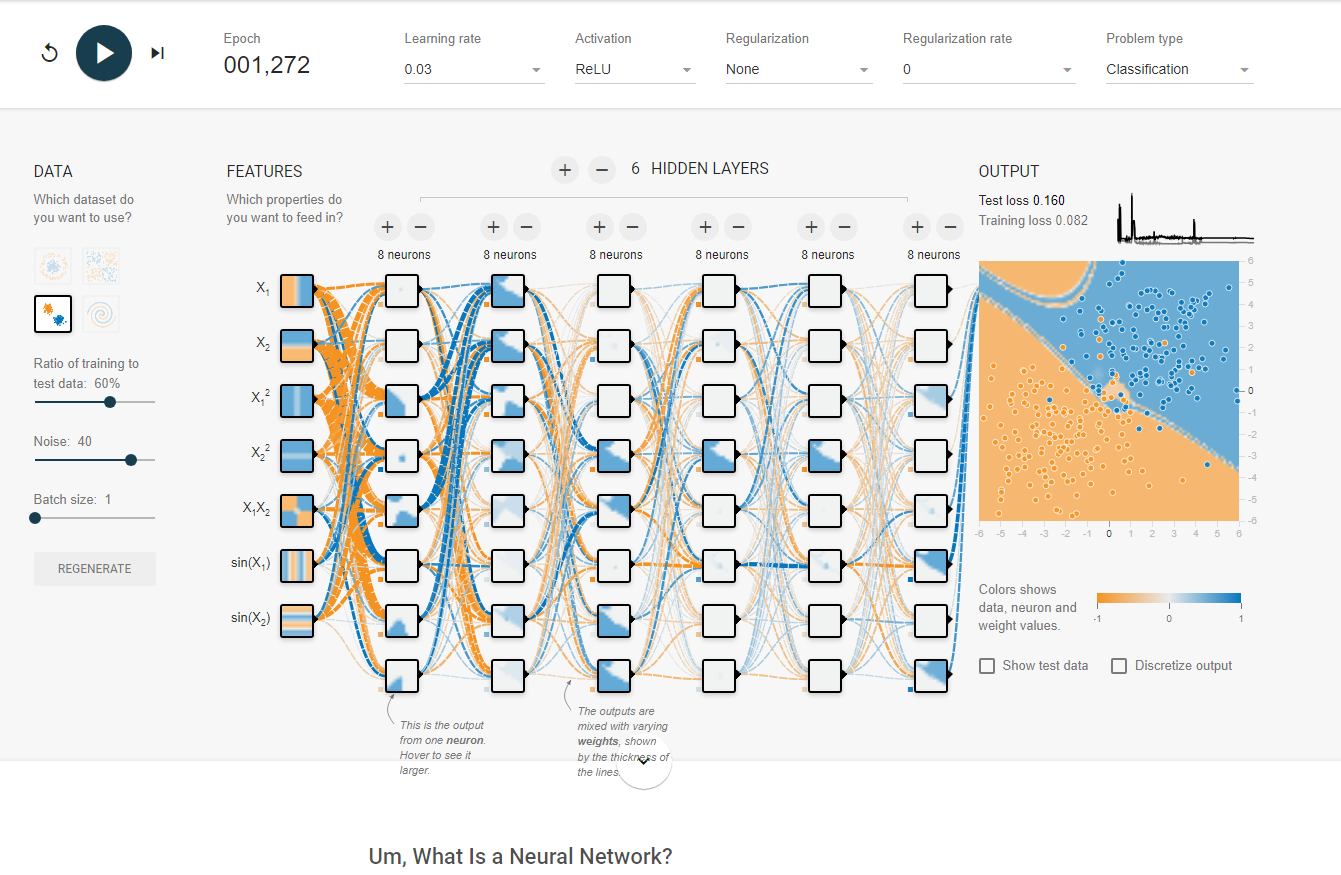

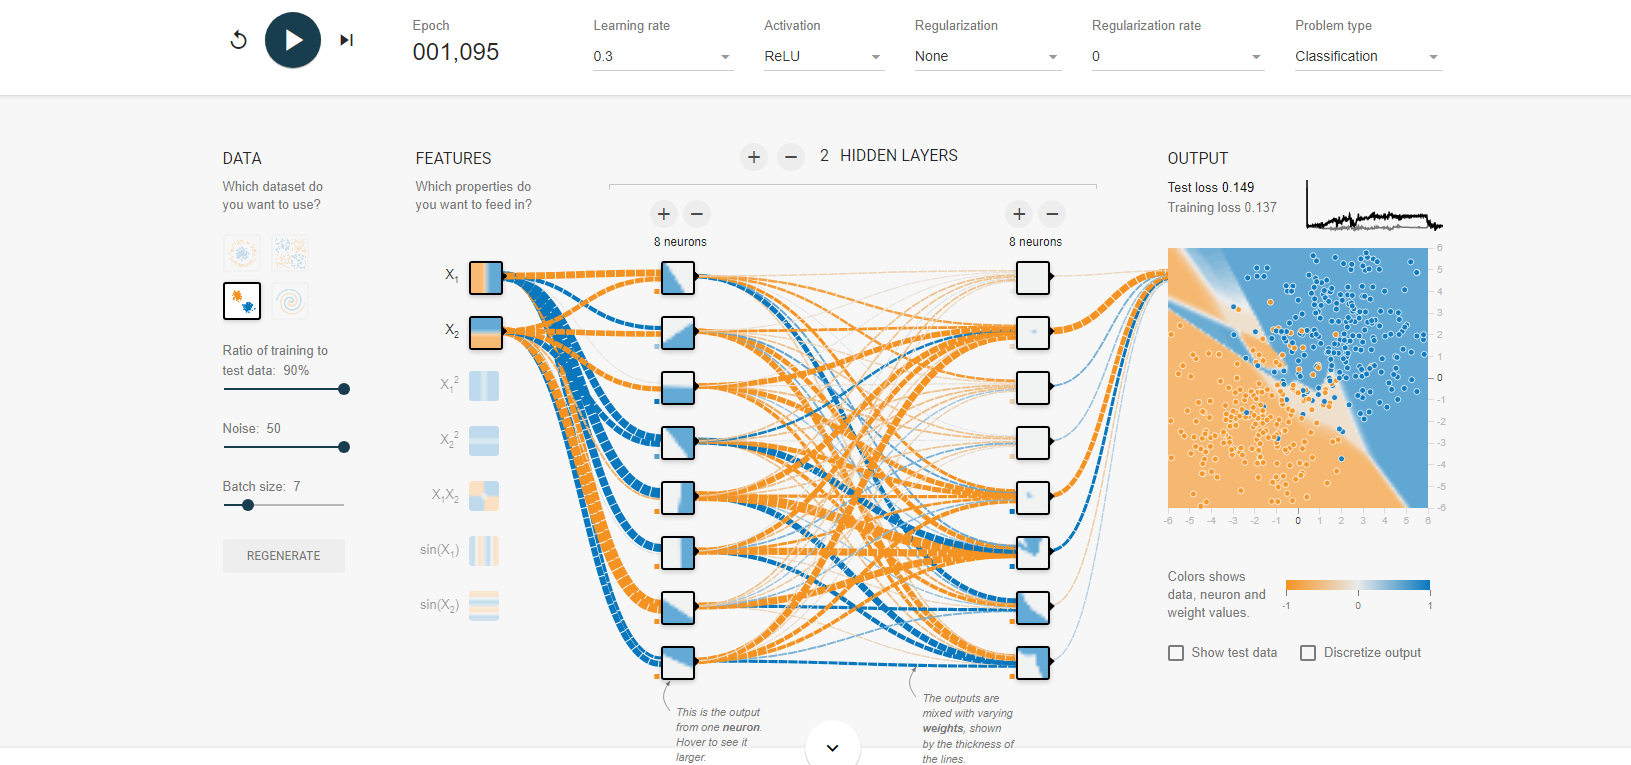

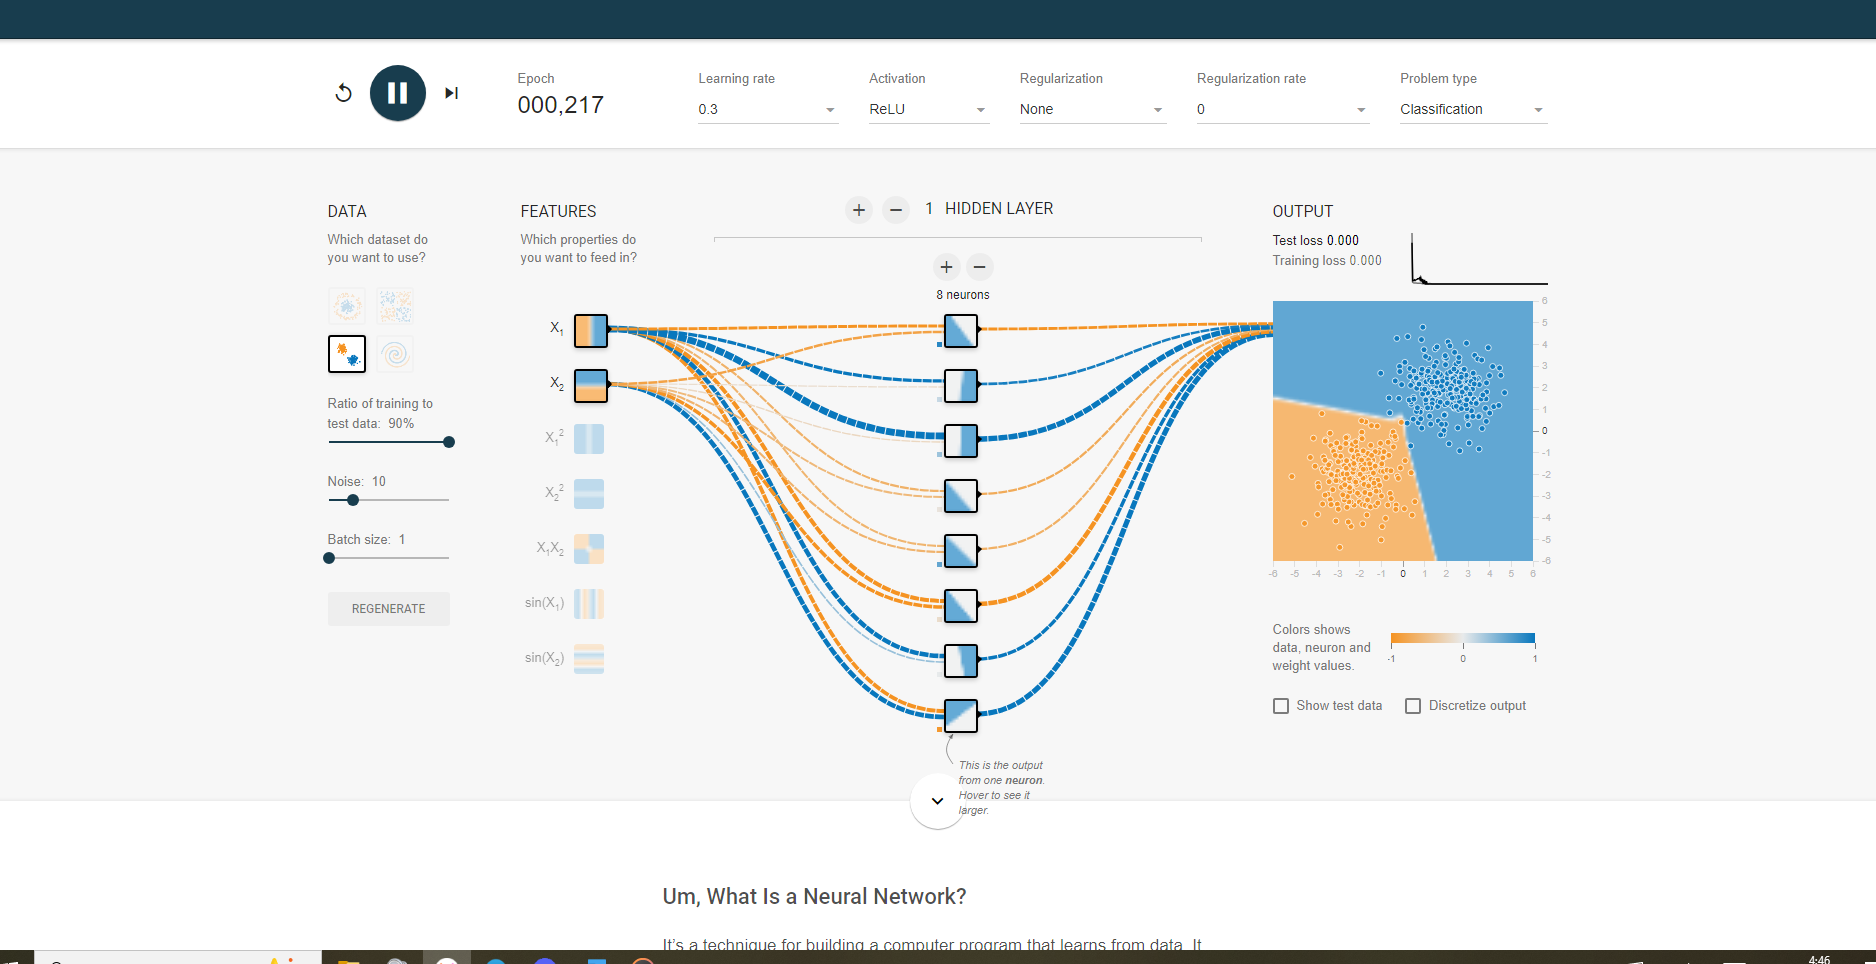

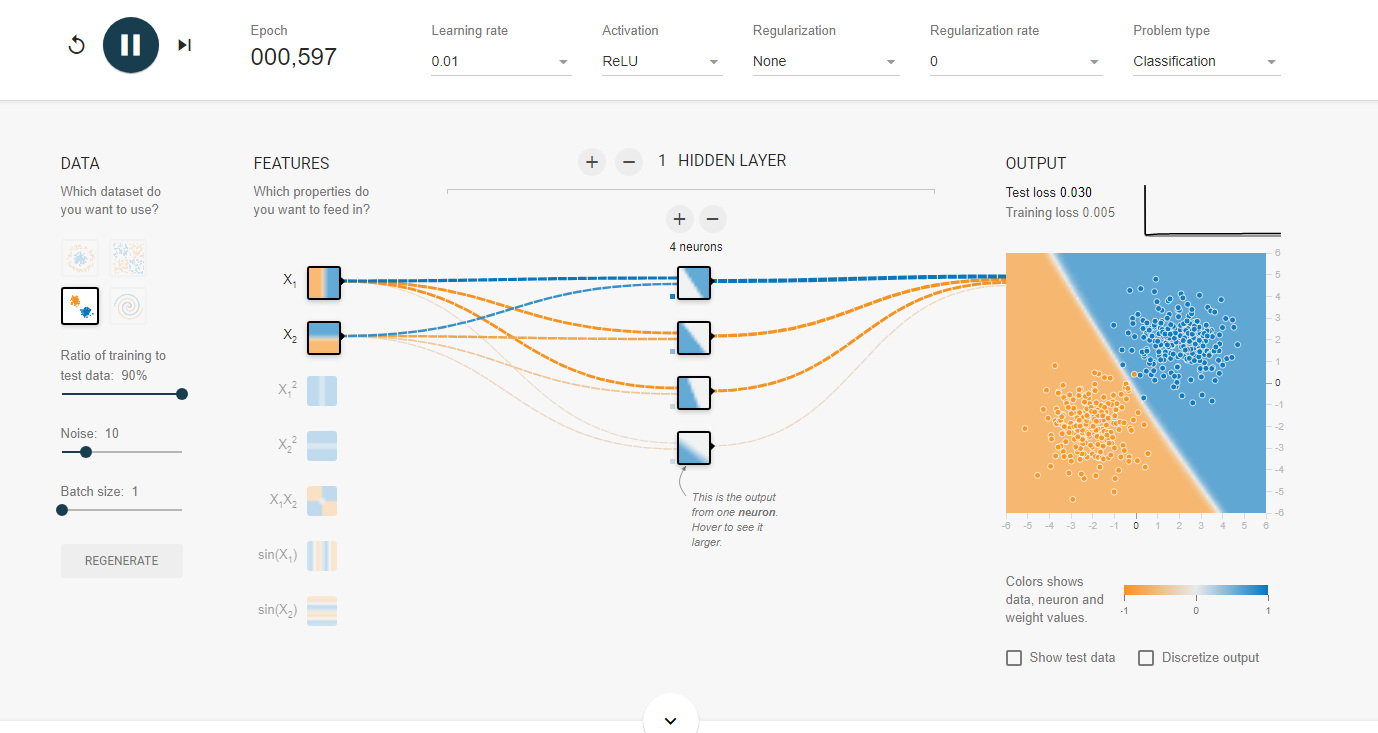

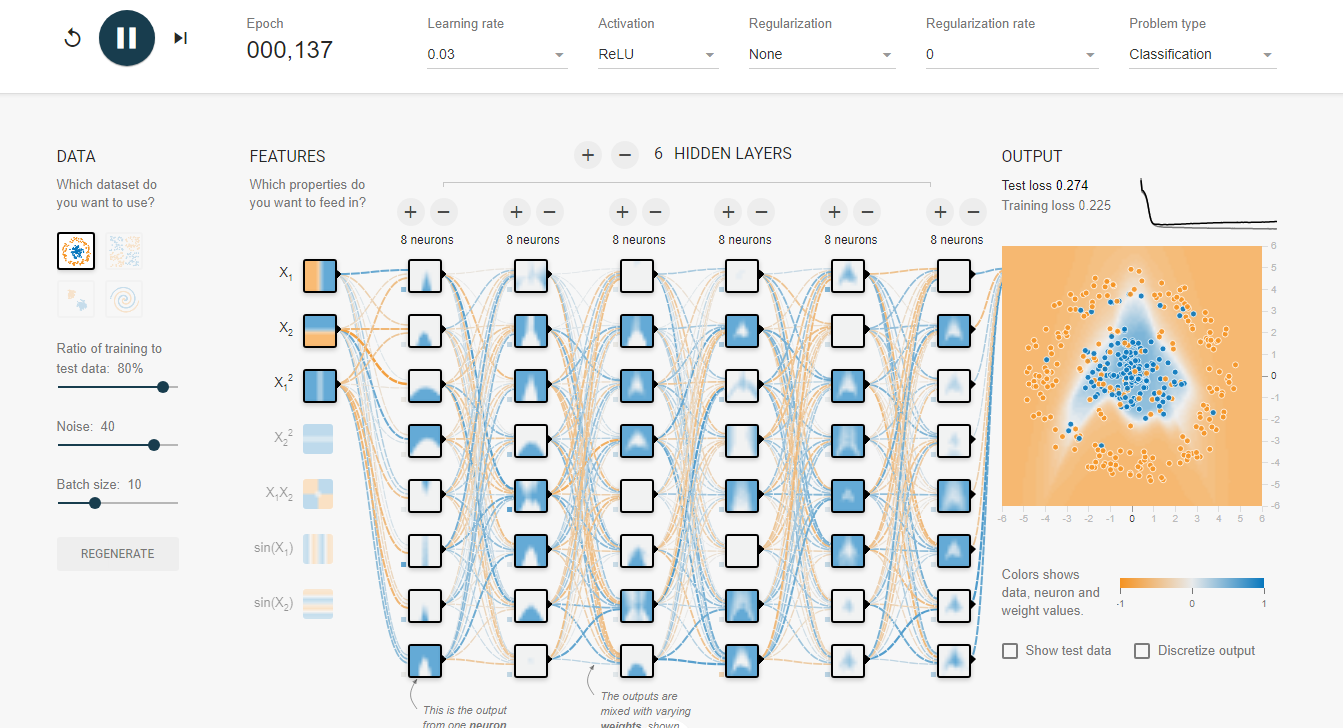

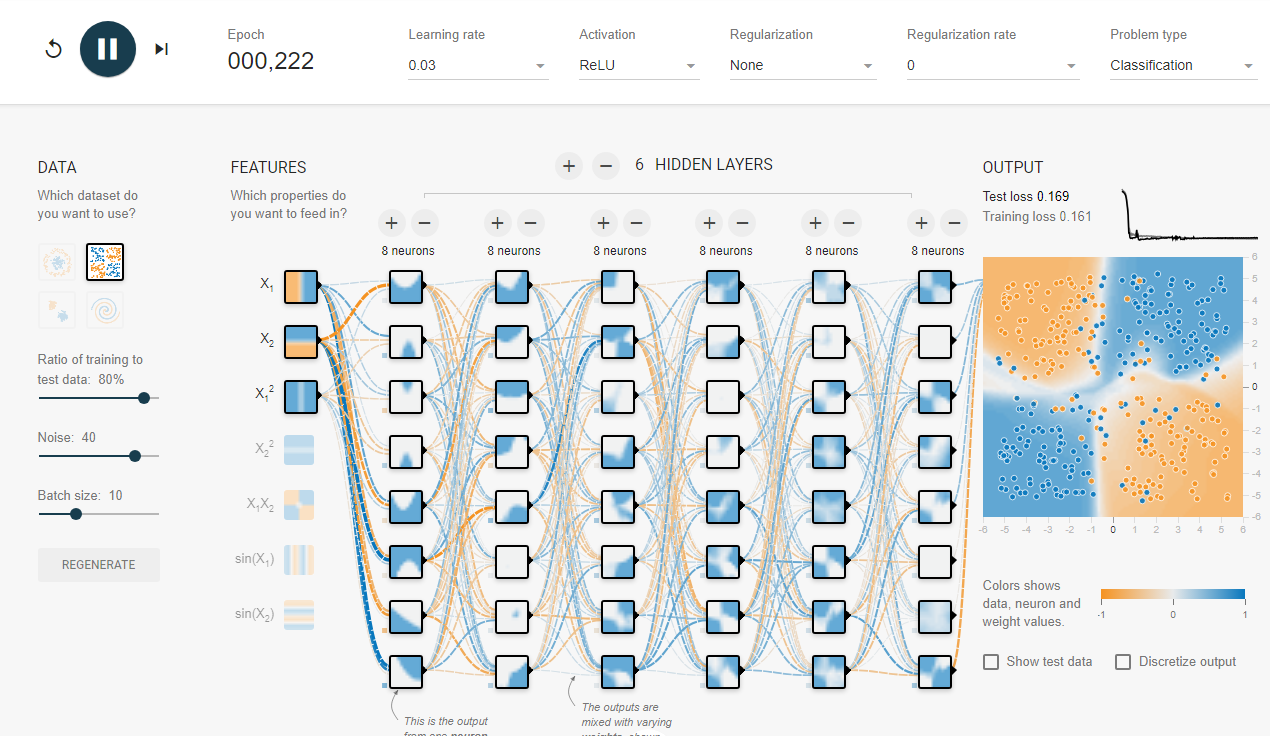

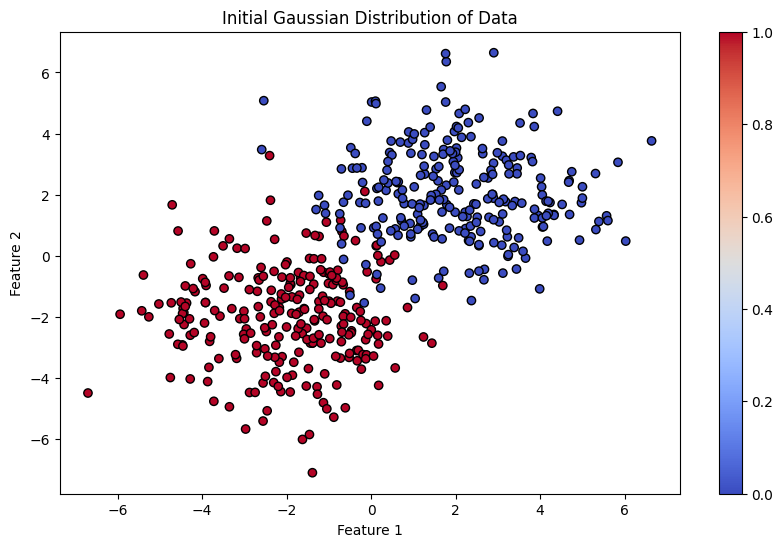

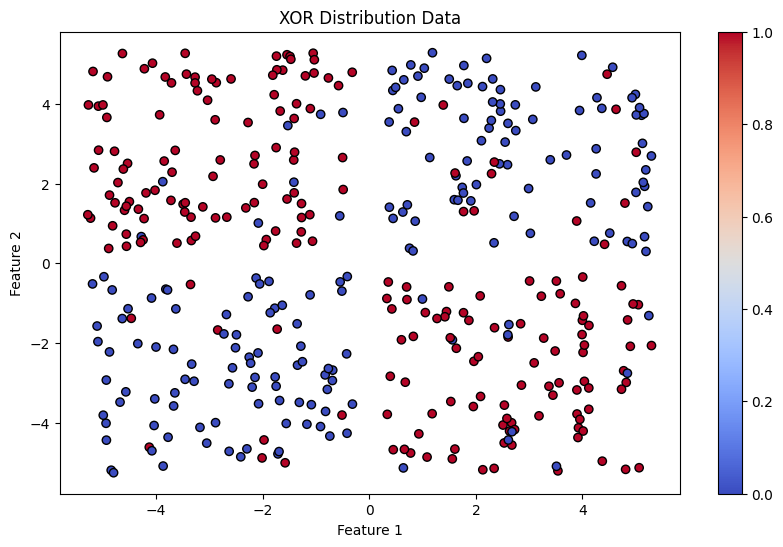

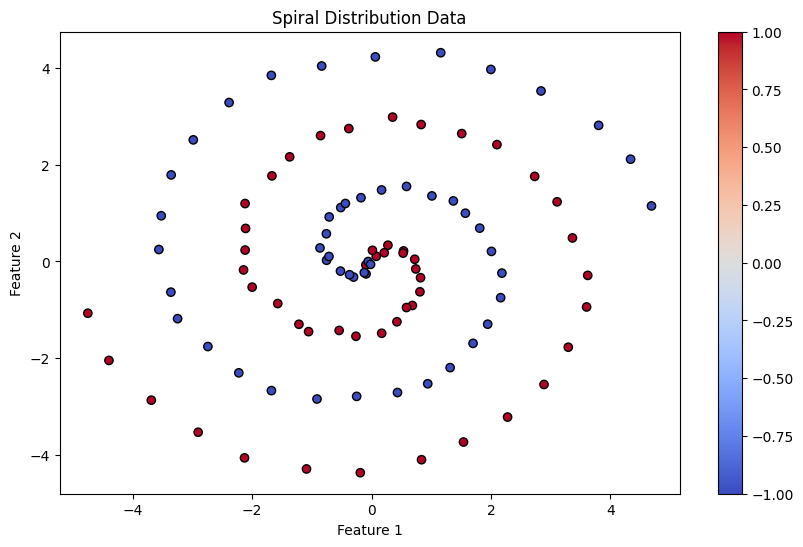

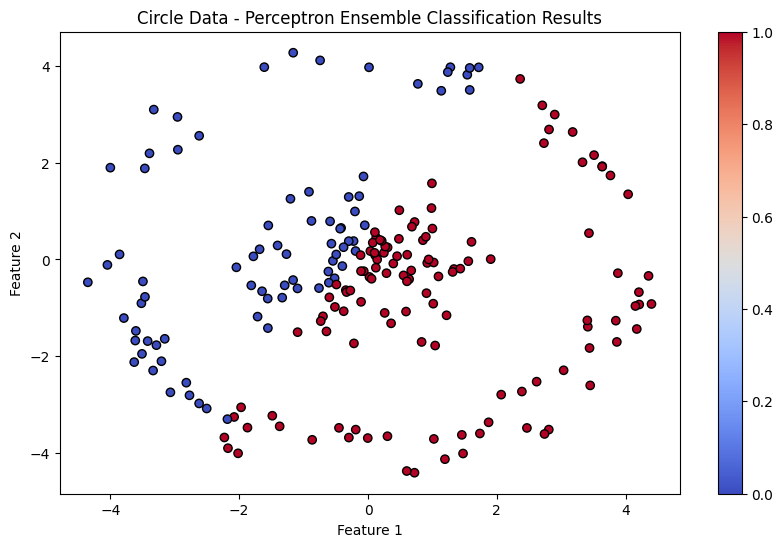

Circle Data - Accuracy: 0.46


In [83]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

class ElementaryPerceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.randn(input_size + 1) * np.sqrt(2. / (input_size + 1))
        self.learning_rate = learning_rate

    def forward(self, xi):
        # Assume xi already has the bias term added externally
        return sigmoid(np.dot(xi, self.weights))

    def train_step(self, xi, target):
        z = np.dot(xi, self.weights)
        output = sigmoid(z)
        error = target - output
        gradient = error * sigmoid_derivative(z)
        self.weights += self.learning_rate * gradient * xi

    def predict(self, x):
        # Assume x already has the bias term added externally
        return self.forward(x)

class PerceptronEnsemble:
    def __init__(self, num_perceptrons, input_size, learning_rate=0.1):
        self.perceptrons = [ElementaryPerceptron(input_size, learning_rate) for _ in range(num_perceptrons)]

    def train(self, X, y, epochs=10):
        X_bias = np.c_[np.ones(X.shape[0]), X]  # Add bias term once here
        for _ in range(epochs):
            for xi, target in zip(X_bias, y):
                for perceptron in self.perceptrons:
                    perceptron.train_step(xi, target)

    def predict(self, X):
        X_bias = np.c_[np.ones(X.shape[0]), X]  # Add bias term once here
        predictions = np.array([perceptron.predict(X_bias) for perceptron in self.perceptrons])
        # Majority vote: count the 1's and see if they make up more than half
        majority_vote = np.mean(predictions > 0.5, axis=0) > 0.7  # More than half of the perceptrons should output 1
        return majority_vote.astype(int)

# Генерация данных для Гаусса, Колец, XOR и Спирали
num_samples = 500
noise = 0.3
center_first_x = -2
center_first_y = -2
center_second_x = 2
center_second_y = 2
gauss_data = generate_gauss(num_samples, noise, center_first_x, center_first_y, center_second_x, center_second_y)

# Генерация данных для колец
radius_ring = 4
radius_center = 2
num_points_ring = 500
num_points_center = 500
noise_range = 0.5  # Range of uniform noise
probability = 0.1
circle_data = generate_circle(radius_ring, radius_center, num_points_ring, num_points_center, noise_range, probability)

# Генерация данных XOR
num_points = 400
padding = 0.3
axis_range = 5
noise = 0.1
xor_data = generate_xor(num_points, padding, axis_range, noise)

# Генерация данных для спирали
num_samples = 100
noise = 0.1
spiral_data = generate_spiral(num_samples, noise)

# Визуализация исходных данных гаусс
plt.figure(figsize=(10, 6))
plt.scatter(gauss_data[:, 0], gauss_data[:, 1], c=gauss_data[:, 2], cmap='coolwarm', marker='o', edgecolors='k')
plt.title('Initial Gaussian Distribution of Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

# Визуализация исходных данных круг
plt.figure(figsize=(10, 6))
plt.scatter(circle_data[:, 0], circle_data[:, 1], c=circle_data[:, 2], cmap='coolwarm', edgecolor='k', marker='o')
plt.title('Circle Distribution Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

# Визуализация данных xor
plt.figure(figsize=(10, 6))
plt.scatter(xor_data[:, 0], xor_data[:, 1], c=xor_data[:, 2], cmap='coolwarm', edgecolor='k', marker='o')
plt.title('XOR Distribution Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

# Визуализация данных spiral
plt.figure(figsize=(10, 6))
plt.scatter(spiral_data[:, 0], spiral_data[:, 1], c=spiral_data[:, 2], cmap='coolwarm', edgecolor='k', marker='o')
plt.title('Spiral Distribution Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

# Разделение и обработка каждого набора данных
datasets = {
    #"Gaussian": gauss_data,
    "Circle": circle_data,
    #"XOR": xor_data,
    #"Spiral": spiral_data
}

# Визуализация и обучение для каждого набора данных
for name, data in datasets.items():
    X = data[:, :2]
    y = data[:, 2]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Создание и обучение ансамбля перцептронов
    ensemble = PerceptronEnsemble(num_perceptrons=3, input_size=X_train.shape[1], learning_rate=0.1)
    ensemble.train(X_train, y_train, epochs=1000)

    # Предсказание на тестовых данных
    predictions = ensemble.predict(X_test)

    # Визуализация результатов
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='coolwarm', marker='o', edgecolors='k')
    plt.title(f'{name} Data - Perceptron Ensemble Classification Results')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    plt.show()

    # Вычисление точности
    accuracy = np.mean(predictions == y_test)
    print(f"{name} Data - Accuracy: {accuracy:.2f}")

